In [8]:
# Usiamo le librerie https://doc.sagemath.org/html/en/reference/groups/sage/groups/additive_abelian/additive_abelian_group.html per implementare il gruppo G. In generale il prodotto diretto di Za1 x Za2 x … x Zan è AdditiveAbelianGroup([a1,a2,...,an]). Il gruppo dei numeri interi Z è AdditiveAbelianGroup([0]). 

G=AdditiveAbelianGroup([4,4])

# Le operazion in in G si fanno nel modo seguente: se vogliamo fare (a,b)+(c,d) in G, dobbiamo scrivere G(vector([a,b]))+G(vector([c,d]))

# Costruiamo adesso le matrici di permutazione che rappresentano G.

def pos(x, L):                    # La funzione che mi associa a un elemento x della lista L la sua posizione nella lista.                       
    for i in range(len(L)):
        if x==L[i]:
            return i

GL=list(G)

def AA(x):
    A=[]
    for j in range(len(GL)):
        Aj=[]
        z=x+GL[j]
        y=pos(z,GL)
        for k in range(len(GL)):
            if k==y:
                Aj.append(1)
            else:
                Aj.append(0)
        A.append(Aj)
    A=matrix(A) # abbiamo costruito la matrice trasposta della matrice che vogliamo.
    A=A.transpose() # trasponiamo la matrice.
    return A


AG=Set()

for x in G:
    A=AA(x)
    A.set_immutable()
    AG=AG+Set({A})
print(len(GL)==AG.cardinality())


True


In [9]:
# Verifichiamo che il determinante delle matrici che rappresentano gli elementi di G è sempre 1 o -1

for a in AG:
    if det(a) not in Set({-1,1}):
        print(a)


In [10]:
# Mostriamo che l'insieme AG con l'operazione righe per colonne è isomorfo a G. Abbiamo già visto che hanno uguale cardinalità, cioè g --> A(g) definisce una biiezione tra G e AG. Mostriamo che g --> A(g) è un morfismo di gruppi.

u=0
for x in G:
    for y in G:
        xy=x+y
        if AA(x+y)!=AA(x)*AA(y):
            print(x,y)
            u=1
            break
if u==0:
    print('AG e G sono isomorfi come gruppi') 


AG e G sono isomorfi come gruppi


In [11]:

# Adesso costruiamo un gruppo di permutazioni isomorfo a G. Lavoriamo nell'ambiente Permutations https://doc.sagemath.org/html/en/reference/combinat/sage/combinat/permutation.html

def perm(g):
    pg=[]
    for h in G:
        z=pos(g+h,GL)
        pg.append(z+1)       # scrivo z+1 perché vogliamo numeri tra 1 e 16.
    return Permutation(pg)
    

GP=Set()
for g in G:
    p=perm(g)
    GP=GP+Set({p})
print(GP.cardinality()==G.cardinality())


True


In [12]:
# Dopo aver verificato che la cardinalità di GP è uguale a quella di G, verifico che g --> perm(g) definisce un morfismo di gruppi. Uso la composizione di permutazioni a.right_action_product(b) dell'ambiente Permutations. Abbiamo che a.right_action_product(b) è la permutazione ab, mentre a.left_action_product(b) è la permutazione ba.

u=0

for g in G:
    pg=perm(g)
    for h in G:
        ph=perm(h)
        if perm(g+h)!=pg.right_action_product(ph):  	
            u=1
            print(g,h)
            break
            
if u==0:
    print('G e GP sono isomorfi come gruppi, dove su GP ho la composizione di funzioni come operazione')


G e GP sono isomorfi come gruppi, dove su GP ho la composizione di funzioni come operazione


In [13]:
# Per trovare i sottogruppi di G possiamo fare in due modi. 

# Primo modo: 

# definiamo una funzione che mi dice se un sottoinsieme di G è un sottogruppo o no.

def gruppo(X):
    u=0
    for a in X:
        if -a not in X:
            u=1
            break
    for a in X:
        for b in X:
            if a+b not in X:
                u=1
                break
        if u==1:
            break
    if u==1:
        return False
    else:
        return True
    
    
c=G.cardinality()

D=divisors(c)   # consideriamo la lista di divisori del numero c. Queste sono le possibili cardinalità di un sottogruppo.

S=Set()

for i in D:
    S=S+Set(Set(G).subsets(i))
    
print(S.cardinality())

SI=Set()

for s in S:                         # Prendiamo solo i sottoinsiemi che contengono l'identità (0,0)
    if G(vector([0,0])) in s:
        SI=SI+Set({s})
print(SI.cardinality())


# Creiamo la lista dei sottogruppi di G.

SG=[]

for s in SI:
    if gruppo(s)==True:
        SG.append(s)

print(len(SG))


14827
6907
15


In [14]:

# Secondo modo: usiamo l'ambiente Permutation groups https://doc.sagemath.org/html/en/reference/groups/sage/groups/perm_gps/permgroup.html
# Rendiamo GG un gruppo di permutazioni (in questo ambiente le permutazioni sono rappresentate da prodotti di cicli disgiunti) e usiamo la funzione subgroups()


GG=G.permutation_group()  

SGP=GG.subgroups()

print(len(SGP))


15


In [15]:
# Per trovare un insieme minimale di generatori prendiamo i sottogruppi ottenuti con il primo metodo (potremmo usare .minimal_generating_set() dell'ambiente Permutation groups, ma mi dà errore). Definiamo prima una funzione che a un sottoinsieme X di G mi associa il sottogruppo generato da quel sottoinsieme. Poi partendo dalle cardinalità piu' basse cerchiamo un insieme di generatori per ogni sottogruppo. SGG è la lista delle coppie [sottogruppo, insieme minimale di generatori]. Nota: due insiemi minimali di generatori possono avere cardinalità diverse. Questo algoritmo ci dà un insieme minimale di generatori, la cui cardinalità è minimale tra tutti gli insiemi minimali di generatori. 

def subgenG(X):
    u=0
    Y=X
    while u==0:
        for s in X:
            for t in X:
                r=s+t
                Y=Y+Set({r,-r})
        if Y.cardinality()==X.cardinality():
            u=1
        X=Y
    return X
    
SGG=[]

for s in SG:
    u=0
    for i in range(G.cardinality()-1):
        for x in Set(G).subsets(i+1):
            if subgenG(x)==s:
                SGG.append([s,x])
                u=1
                break
            
        if u==1:
            break
            
print(len(SGG))

15


In [16]:
# Vediamo chi è un insieme minimale di generatori per G.

for g in SGG:
    if g[0].cardinality()==G.cardinality():
        print(g[1])

{(0, 1), (1, 0)}


In [17]:
# Cerchiamo le classi di isomorfismo dei sottogruppi di G, usando la funzione is_isomorphic() dell'ambiene Permutation groups.

H=[SGP[0]]

for i in range(len(SGP)):
    u=0
    for j in range(len(H)):
        if SGP[i].is_isomorphic(H[j]):
            u=1
            break
    if u==0:
        H.append(SGP[i])

print(len(H))


6


In [18]:
# Usiamo la funzione is.cyclic() per vedere se G è ciclico.

GG.is_cyclic()

False

In [19]:
# Troviamo tutti i sottogruppi ciclici di G.

C=[]

for i in range(len(SGP)):
    if SGP[i].is_cyclic():
        C.append(SGP[i])
        
print(len(C))

10


In [20]:
# Il gruppo G è generato da {(1,0), (0,1)}. Il gruppo GG, nell'ambiente Permutation groups, è generato da {(1,2,3,4), (5,6,7,8)} (vederlo facendo stampare GG). Se (1,0) corrisponde a (1,2,3,4) e (0,1) corrisponde al ciclo (5,6,7,8), allora (1,2) = (1,0)+(0,1)+(0,1) corrisponde a (1,2,3,4)(5,6,7,8)(5,6,7,8) = (1,2,3,4)(5,7)(6,8), e (2,2)=(1,0)+(1,2) corrisponde a (1,2,3,4)(1,2,3,4)(5,7)(6,8)=(1,3)(2,4)(5,7)(6,8).


H1 = PermutationGroup([[(1,2,3,4),(5,7),(6,8)]])  # sottogruppo generato da {(1,2)}
H2 = PermutationGroup([[(1,2,3,4)],[(1,3),(2,4),(5,7),(6,8)]])   # sottogruppo generato da {(0,1), (2,2)}

print(H1.cardinality(),H2.cardinality())

GH1=GG.quotient(H1)
GH2=GG.quotient(H2)

print(GH1.cardinality(), GH2.cardinality())

print(GH1.is_cyclic(), GH2.is_cyclic())    

print(GH1.minimal_generating_set(), GH2.minimal_generating_set())	


4 8
4 2
True True
[(1,2,3,4)] [(1,2)]


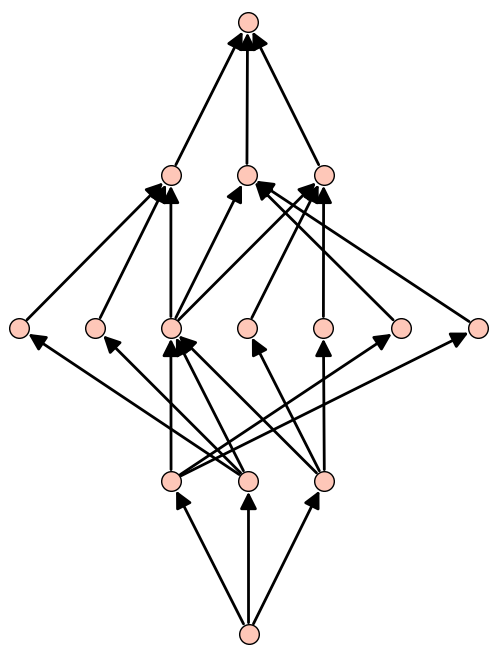

In [21]:
#Rappresentiamo con un diagramma di Hasse il poset dei sottogruppi di G.

def ordine(u,v):
        if u.intersection(v)==u:
                return True
        else:
                return False

def POSET(R):
    elms=R
    return Poset((elms, ordine))


P=POSET(Set(SG))
P.plot(label_elements=False, figsize=10)	



In [22]:
# Notare che per ogni cardinalità ammissibile per un sottogruppo di G, esiste un sottogruppo di quella cardinalità. Questo fatto non è sempre vero. Per i gruppi ciclici finiti, come abbiamo visto a lezione, è sempre vero. Piu' in generale, i gruppi abeliani finiti hanno questa proprietà, essendo prodotti diretti di gruppi ciclici finiti ( vedere il teorema di classificazione dei gruppi abeliani finiti https://en.wikipedia.org/wiki/Abelian_group#Classification ).

# Cerchiamo un gruppo G tale che d è divisore della sua cardinalità ma G non ha un sottogruppo di cardinalità d. Nei gruppi simmetrici S2 e S3, come si può facilmente vedere, non possiamo trovarlo. Cerchiamolo in S4.

S4=PermutationGroup([[(1,2)],[(2,3)],[(3,4)]])  # Gruppo delle permutazioni di 4 elementi (è generato da 3 trasposizioni semplici).
S4.cardinality()   # Ha cardinalità 4! = 24

U=S4.subgroups()  # Prendiamo tutti i suoi sottogruppi.

for f in U:                      # Cerchiamo un sottogruppo di S4 che non abbia la proprietà sopra menzionata.
    c=f.cardinality()
    D=Set(divisors(c))
    sf=f.subgroups()
    B=Set()
    for a in sf:
        b=a.cardinality()
        B=B+Set({b})
    if B!=D:
        print(f, B, f.is_abelian())
        break

# Troviamo un sottogruppo di cardinalità 12 i cui sottogruppi hanno cardinalità 1, 2, 4, 12. Quindi manca la cardinalità 6. Questo gruppo non è abeliano.

Subgroup generated by [(2,4,3), (1,2)(3,4), (1,3)(2,4)] of (Permutation Group with generators [(3,4), (2,3), (1,2)]) {1, 2, 3, 4, 12} False
